# PROYECTO FINAL

## Problema 2

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical



In [43]:
# Cargamos el dataset
digitos = pd.read_csv('train.csv')
digitos

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Verificamos si hay columnas que tengamos que hacerle algún tipo de imputación
cols_con_na = [col for col in digitos.columns if(digitos[col].isnull().mean()>0)]
cols_con_na
#Observamos que no hay ninguna columna con valores faltantes

[]

In [45]:
# Separamos el dataset en variables independientes X y dependientes y
X = digitos.drop(columns=['label']).values
y = digitos['label'].values

# Realizamos el reshape para convertir los valores de la tabla en imagenes
X = X.reshape(-1, 28, 28, 1)

#Realizamos el One Hot Encoding a la variable dependiente, son 10 clases ya que va de 0 a 9
y = to_categorical(y, num_classes=10)

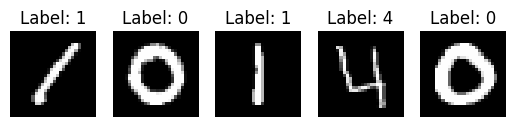

In [46]:
# Realizamos un vistazo rapido de algunos valores para asegurar que se hayan generado bien las imagenes
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {np.argmax(y[i])}') 
    plt.axis('off')
plt.show()

### Red neuronal artificial

In [47]:
import tensorflow as tf
import tensorflow.keras as kr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [48]:
# Dividimos el dataset en conjuntos de entrenamiento y prueba
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,shuffle=True, random_state=2023)

In [49]:
#Inicializamos el modelo
modelANN = kr.models.Sequential()

modelANN.add(kr.layers.Flatten(input_shape=(28, 28, 1)))

#Agregramos la primera capa oculta, una capa densa
modelANN.add(kr.layers.Dense(input_dim=784,units=1024,activation='relu'))

#Segunda capa oculta
modelANN.add(kr.layers.Dense(units=512,activation='relu'))

#Tercera capa oculta
modelANN.add(kr.layers.Dense(units=256,activation='relu'))

#Capa de salida
modelANN.add(kr.layers.Dense(units=10, activation='softmax'))

In [50]:
#Compilamos el modelo
modelANN.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#Ajustamos el modelo
modelANN.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
1050/1050 [==============================] - 22s 20ms/step - loss: 1.3953 - accuracy: 0.8882
Epoch 2/50
1050/1050 [==============================] - 21s 20ms/step - loss: 0.2277 - accuracy: 0.9413
Epoch 3/50
1050/1050 [==============================] - 21s 20ms/step - loss: 0.1809 - accuracy: 0.9523
Epoch 4/50
1050/1050 [==============================] - 22s 21ms/step - loss: 0.1496 - accuracy: 0.9594
Epoch 5/50
1050/1050 [==============================] - 21s 20ms/step - loss: 0.1311 - accuracy: 0.9642
Epoch 6/50
1050/1050 [==============================] - 22s 21ms/step - loss: 0.1138 - accuracy: 0.9682
Epoch 7/50
1050/1050 [==============================] - 25s 24ms/step - loss: 0.1042 - accuracy: 0.9711
Epoch 8/50
1050/1050 [==============================] - 22s 21ms/step - loss: 0.1019 - accuracy: 0.9740
Epoch 9/50
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0934 - accuracy: 0.9768
Epoch 10/50
1050/1050 [==============================] - 22s 21m

In [51]:
#Evaluamos el modelo ANN
loss_ann,accuracy_ann = modelANN.evaluate(X_test,y_test)
print(f'{loss_ann = },{accuracy_ann = }')

263/263 [==============================] - 1s 4ms/step - loss: 0.4466 - accuracy: 0.9717
loss_ann = 0.4466108977794647,accuracy_ann = 0.971666693687439


### Red neuronal convolucional

In [52]:
modelCNN = kr.models.Sequential()

# Agregamos la primera capa de convolución 2D
modelCNN.add(kr.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Capa de max pooling
modelCNN.add(kr.layers.MaxPooling2D((2, 2)))

# Segunda capa de convolución 2D
modelCNN.add(kr.layers.Conv2D(64, (3, 3), activation='relu'))
# Capa de max pooling
modelCNN.add(kr.layers.MaxPooling2D((2, 2)))

# Capa de aplanamiento
modelCNN.add(kr.layers.Flatten())

# Capa densa
modelCNN.add(kr.layers.Dense(128, activation='relu'))
# Capa de salida
modelCNN.add(kr.layers.Dense(10, activation='softmax'))

In [53]:
#Compilamos el modelo
modelCNN.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#Ajustamos el modelo
modelCNN.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
1050/1050 [==============================] - 15s 14ms/step - loss: 0.4896 - accuracy: 0.9343
Epoch 2/50
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0693 - accuracy: 0.9787
Epoch 3/50
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0487 - accuracy: 0.9847
Epoch 4/50
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0457 - accuracy: 0.9861
Epoch 5/50
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0361 - accuracy: 0.9889
Epoch 6/50
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0315 - accuracy: 0.9899
Epoch 7/50
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0323 - accuracy: 0.9904
Epoch 8/50
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0263 - accuracy: 0.9916
Epoch 9/50
1050/1050 [==============================] - 14s 14ms/step - loss: 0.0253 - accuracy: 0.9926
Epoch 10/50
1050/1050 [==============================] - 15s 14m

In [55]:
#Evaluamos el modelo CNN
loss_cnn,accuracy_cnn = modelCNN.evaluate(X_test,y_test)
print(f'{loss_cnn = },{accuracy_cnn = }')

263/263 [==============================] - 2s 8ms/step - loss: 0.3702 - accuracy: 0.9854
loss_cnn = 0.3702203929424286,accuracy_cnn = 0.9853571653366089


### Comparación de resultados

In [58]:
# Creamos la tabla para comparar los valores de loss y accuracy de ambos modelos
data = {'Modelo': ['ANN', 'CNN'],
        'Loss': [loss_ann, loss_cnn],
        'Accuracy': [accuracy_ann, accuracy_cnn]}

tabla = pd.DataFrame(data)
tabla

,Modelo,Loss,Accuracy
0,ANN,0.446611,0.971667
1,CNN,0.370220,0.985357


Red Neuronal Artificial (ANN)  
Para crear este modelo se trabajó con una capa densa, 3 capas ocultas y una capa de salida. Al principio se habían escogido 5 capas ocultas por la cantidad de datos de entrada que esta recibiria, pero consumía mucho recurso computacional, se redujo a 3 capas y disminuyó el loss y aumentó el accuracy. Creyendo que al reducir capas mejorarían estos valores se probó con una y dos capas pero los resultados fueron insatisfactorios, por lo que dejamos 3 capas.  

Red Neuronal Convolucional (CNN)  
Se trabajó con 2 capas de convolucion con el shape que tienen las imagenes de 28x28 y una capa max pooling para cada capa de convolución, esto con el objetivo de reducir la probabilidad de sobreajuste. Se agregó una capa densa antes de la capa de salida para aprender patrones sobre las caracteristicas extraidas por las capas de convolución y la capa de salida con una función de activación softmax.  

Para ambos modelos se trabajó con el mismo reshape y split del dataset, con un 80% de datos para entrenamiento y un 20% para testeo. 

CONCLUSIONES  
Para los problemas de visión por computadora, o al menos este problema en especifico, la mejor técnica para crear algoritmos de clasificación es utilizar una Red Neuronal Convolucional (CNN), aunque el accuracy fue muy parecido, el parámetro loss si tuvo gran impacto.  

Esto concuerda con la teoria de que las CNN son las mejores para trabajar con imagenes, videos o datos de visión por computadora, ya que están hechas especialmente para este fin y están optimizadas para trabajar con mayor cantidad de parámetros y datos en comparación con las ANN. Esto fue comprobado ya que el modelo ANN tardó en compilar mucho mas tiempo que el CNN.  

Cabe mencionar que se podrían probar muchas mas configuraciones en la arquitectura del modelo ANN para mejorar su rendimiento, pero de igual manera podría hacerse con el CNN.